In [1006]:
# NAME: David Mmaduabuchi OKPAGA
# DOSSIER: 22313043 
# COURSE: M2 Statistics Project 2023
# DATE: 21/11/2023

import numpy as np
from mpmath import mp
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
from scipy import stats
from numpy.linalg import eig
plt.style.use('bmh')
matplotlib.rcParams['figure.dpi'] = 100

In [1007]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 6)

# I - Digit Density of Some Irrational Numbers

### 1. Computing frequencies of the 10 digits [0,9] in $\pi$

In [906]:
N = int(5e4)
mp.dps = N                # number of digits of pi
π = str(mp.pi)            # generating pi with the required number of digits as string

In [907]:
π

'3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201

### 2. Drawing Histogram with error bars

In [908]:
count = np.zeros(10)    # array to store the frequency of the digits(the position in the array stores the corresponding number's frequency)
for i in range(2,N):    # loop to calculate the frequency of each digit
    count[int(pi[i])] += 1
count /= N              # normalizing the frequencies

In [909]:
sigma_fd = np.sqrt(count*(1-count)/N)              #calculating the error in the frequeny values
print(sigma_fd)

[0.00134557 0.00134806 0.00132563 0.0013353  0.00134283 0.00134782
 0.00134378 0.00133889 0.00134521 0.00134283]


<BarContainer object of 10 artists>

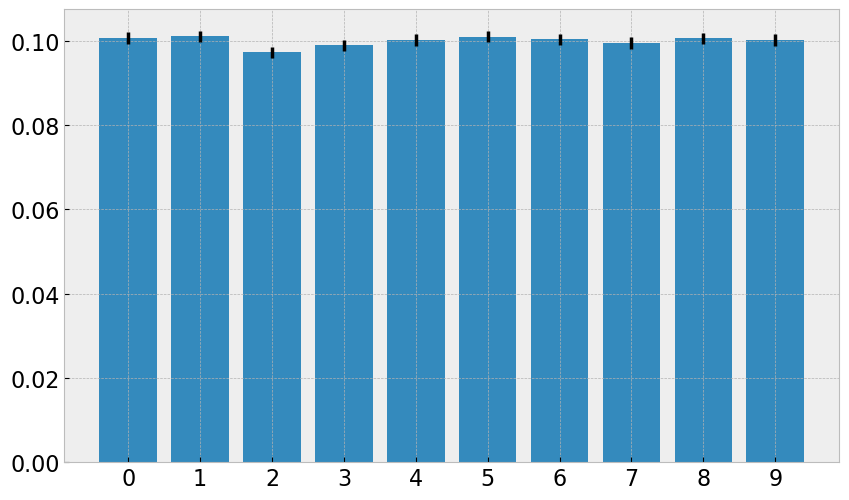

In [910]:
# Histogram with error bars
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)

### 3. Fitting the function to check for equiprobability hypothesis

In [911]:
# defining the two parameter linear function. a and b are parameters, d is the digit
# if the values of a and b are not passed then the function assumes and equiprobability hypothesis and take a,b = 1,0
def f(d,α=1.0,β=0.0):
    y = α/10 +  β*d
    return y
# the (a, β) values for equiprobability hypothesis should be (1.0,0.0)

In [912]:
count        # normalized frequencies of the digits

array([0.10066, 0.10108, 0.09734, 0.09894, 0.1002 , 0.10104, 0.10036,
       0.09954, 0.1006 , 0.1002 ])

In [913]:
ds = np.linspace(0,9,10)             # array to contain the digits
par,cov = curve_fit(f,ds,count)      # performing the fit

### 4. Best Fit Parameters with Uncertainties, Correlation and $\chi^2$ and p-value

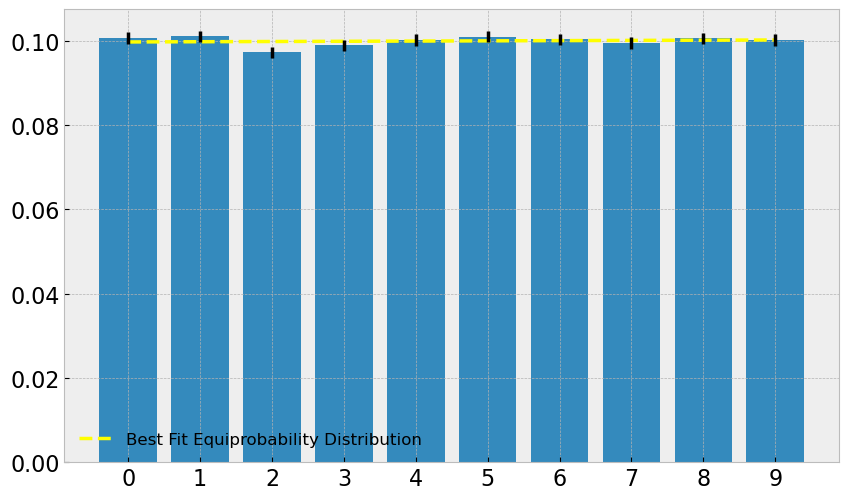

In [914]:
plt.plot(ds,f(ds,par[0],par[1]),color = 'yellow', label = 'Best Fit Equiprobability Distribution',linestyle = '--')
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)
plt.legend()
plt.show()

In [915]:
print(f'The best fit parameter values (α,β) = ({par[0]},{par[1]})')
print(f'The uncertainties in (α,β) = ({np.sqrt(cov[0,0])},{np.sqrt(cov[1,1])})')
print(f'The correlation between α and β = {cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))}')

The best fit parameter values (α,β) = (0.9976145468711566,5.2121195055931935e-05)
The uncertainties in (α,β) = (0.0070284276466683875,0.00013165450901238946)
The correlation between α and β = -0.8429272656553298


In [916]:
# computing the chi2
chi_2 = np.sum(((count - f(ds,par[0],par[1]))/sigma_fd)**2)

In [917]:
print(f'The chi2 value was calculated to be {chi_2}')

The chi2 value was calculated to be 6.430297447518462


In [918]:
dof = 10 - 2               # Degrees of freedom of the problem(10 points and 2 parameters)
pvalue = 1 - stats.chi2.cdf(chi_2,dof)        # calculating the correspondin p-value for 8 degrees of freedom
print(f'p-value = {pvalue}')

p-value = 0.5991490099992772


### 5. plotting the IC95 error ellipse using the covariance matrix returned by the curve_fit() function
the square root of its eigenvalues are semi major and semi minor axis of the ellipse
The angle of the ellipse can also be calculated using the matrix

In [919]:
delta_chi2 = stats.chi2.ppf(0.95,2)                # delta_chi2 for IC95 for 2 degrees of freedom(a and b)
scale_factor = np.sqrt(delta_chi2)                 # factor by which the error ellipse scales

In [920]:
eigenvalues,eigenvectors = eig(cov)                # eigenvalues and aeigenvectors of the covariance matrix
major = 2*np.sqrt(eigenvalues[0])*scale_factor     # getting major and minor axes from the eigenvalues and scale factor
minor = 2*np.sqrt(eigenvalues[1])*scale_factor
theta = 0.5*np.arctan(2*cov[0,1]/(cov[0,0] - cov[1,1]))*180/np.pi     # angle of ellipse

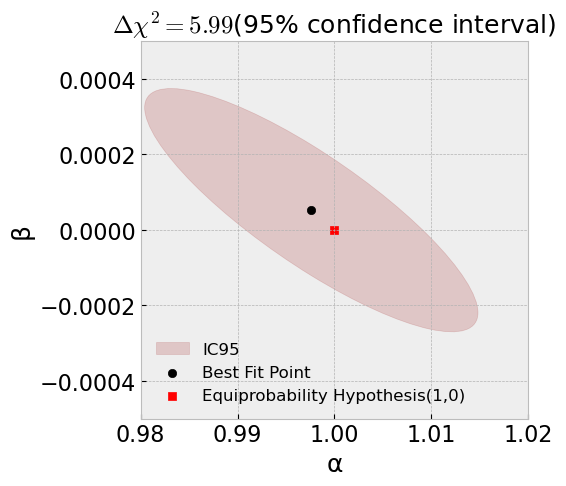

In [921]:
# plotting the IC95 ellipse and indicating best fit point and equiprobability hypothesis point
e95 = matplotlib.patches.Ellipse((par[0],par[1]),major,minor,theta,alpha = 0.2,color = 'brown', label = 'IC95')
fig, ax = plt.subplots(figsize=(5,5))
ax.add_artist(e95)
ax.scatter(par[0],par[1],marker = 'o',label = 'Best Fit Point',c = 'black')
ax.scatter(1,0,marker = 's',label = 'Equiprobability Hypothesis(1,0)',c = 'red')
ax.set_xlim(0.98,1.02)
ax.set_ylim(-0.0005,0.0005)
ax.set_xlabel('α')
ax.set_ylabel('β')
ax.set_title(f'$\Delta \chi^2 = {round(delta_chi2,2)}$(95% confidence interval)')
ax.legend()
plt.show()

In [922]:
chi2_hypo = np.sum(((count - f(ds))/sigma_fd)**2)                   # calculating chi2(a_0,b_0)
delta_chi2_hypo = chi2_hypo - chi_2                                 # calculating Delta_chi2(a_0,b_0)
pvalue_hypo = stats.chi2.sf(delta_chi2_hypo,2)                      # calculating the corresponding p-value
print(f'The corresponding p-value to the delta chi2 of the hypothesis point is {pvalue_hypo}')

The corresponding p-value to the delta chi2 of the hypothesis point is 0.9336905646422448


## Computation of euler's constant $e$

### 1. Computing frequencies of the 10 digits [0,9] in $e$

In [923]:
N = int(5e4)
mp.dps = N                    # number of digits of pi
e = str(mp.euler)             # generating pi with the required number of digits as string

In [924]:
e

'0.5772156649015328606065120900824024310421593359399235988057672348848677267776646709369470632917467495146314472498070824809605040144865428362241739976449235362535003337429373377376739427925952582470949160087352039481656708532331517766115286211995015079847937450857057400299213547861466940296043254215190587755352673313992540129674205137541395491116851028079842348775872050384310939973613725530608893312676001724795378367592713515772261027349291394079843010341777177808815495706610750101619166334015227893586796549725203621287922655595366962817638879272680132431010476505963703947394957638906572967929601009015125195950922243501409349871228247949747195646976318506676129063811051824197444867836380861749455169892792301877391072945781554316005002182844096053772434203285478367015177394398700302370339518328690001558193988042707411542227819716523011073565833967348717650491941812300040654693142999297779569303100503086303418569803231083691640025892970890985486825777364288253954925873629596133298574739

### 2. Drawing Histogram with error bars

In [925]:
count = np.zeros(10)    # array to store the frequency of the digits(the position in the array stores the corresponding number's frequency)
for i in range(2,N):    # loop to calculate the frequency of each digit
    count[int(e[i])] += 1
count /= N                 # normalizing the frequencies

In [926]:
sigma_fd = np.sqrt(count*(1-count)/N)              # calculating the error in the frequeny values
sigma_fd

array([0.00134367, 0.00134948, 0.00132137, 0.00133578, 0.00134176,
       0.00135089, 0.00134271, 0.0013383 , 0.00134438, 0.00134746])

<BarContainer object of 10 artists>

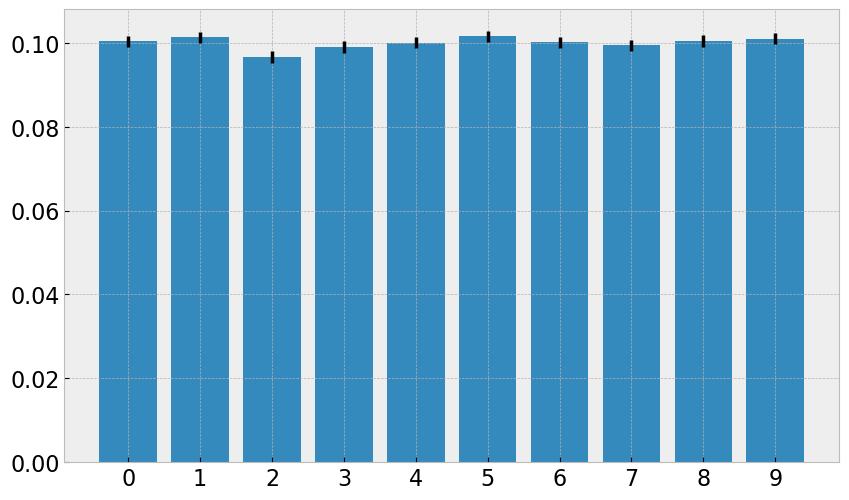

In [927]:
# Histogram with error bars
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)

### 3. Fitting the function to check for equiprobability hypothesis

In [928]:
# defining the two parameter linear function. a and b are parameters, d is the digit
# if the values of a and b are not passed then the function assumes and equiprobability hypothesis and take a,b = 1,0
def f(d,α=1.0,β=0.0):
    y = α/10 + β*d
    return y
# the (α,β) values for equiprobability hypothesis should be (1.0,0.0)

In [929]:
count        # normalized frequencies of the digits

array([0.10034, 0.10132, 0.09664, 0.09902, 0.10002, 0.10156, 0.10018,
       0.09944, 0.10046, 0.10098])

In [930]:
ds = np.linspace(0,9,10)             # array to contain the digits
par,cov = curve_fit(f,ds,count)      # performing the fit

### 4. Best Fit Parameters with Uncertainties, Correlation and $\chi^2$ and p-value

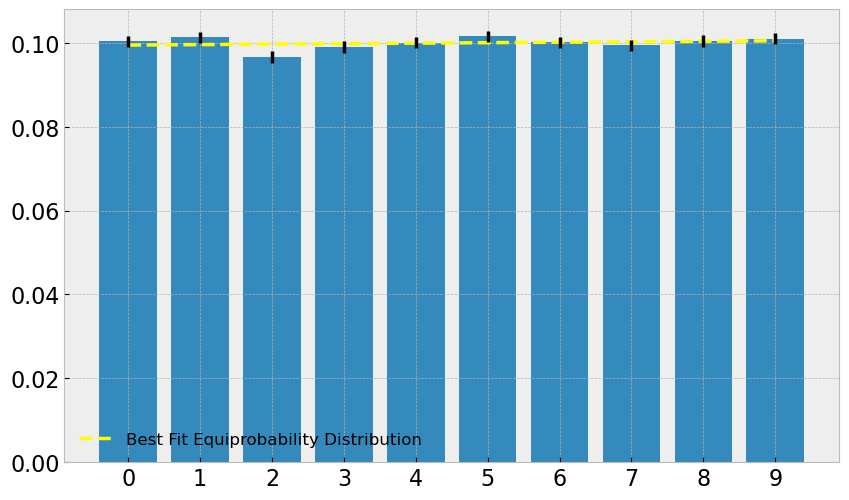

In [931]:
plt.plot(ds,f(ds,par[0],par[1]),color = 'yellow', label = 'Best Fit Equiprobability Distribution',linestyle = '--')
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)
plt.legend()
plt.show()

In [932]:
print(f'The best fit parameter values (α,β) = ({par[0]},{par[1]})')
print(f'The uncertainties in (α,β) = ({np.sqrt(cov[0,0])},{np.sqrt(cov[1,1])})')
print(f'The correlation between α and β = {cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))}')

The best fit parameter values (α,β) = (0.9948436375751804,0.0001136969645619823)
The uncertainties in (α,β) = (0.008566237533169712,0.00016046033976001027)
The correlation between α and β = -0.8429272223478295


In [933]:
# computing the chi2
chi_2 = np.sum(((count - f(ds,par[0],par[1]))/sigma_fd)**2)

In [934]:
print(f'The chi2 value was calculated to be {chi_2}')

The chi2 value was calculated to be 9.569369066566082


In [935]:
dof = 10 - 2               # Degrees of freedom of the problem(10 points and 2 parameters)
pvalue = 1 - stats.chi2.cdf(chi_2,dof)        # calculating the correspondin p-value for 8 degrees of freedom
print(f'p-value = {pvalue}')

p-value = 0.2965598026785079


### 5. plotting the IC95 error ellipse using the covariance matrix returned by the curve_fit() function
the square root of its eigenvalues are semi major and semi minor axis of the ellipse
The angle of the ellipse can also be calculated using the matrix

In [936]:
delta_chi2 = stats.chi2.ppf(0.95,2)                # delta_chi2 for IC95 for 2 degrees of freedom(a and b)
scale_factor = np.sqrt(delta_chi2)                 # factor by which the error ellipse scales

In [937]:
eigenvalues,eigenvectors = eig(cov)                # eigenvalues and aeigenvectors of the covariance matrix
major = 2*np.sqrt(eigenvalues[0])*scale_factor     # getting major and minor axes from the eigenvalues and scale factor
minor = 2*np.sqrt(eigenvalues[1])*scale_factor
theta = 0.5*np.arctan(2*cov[0,1]/(cov[0,0] - cov[1,1]))*180/np.pi     # angle of ellipse

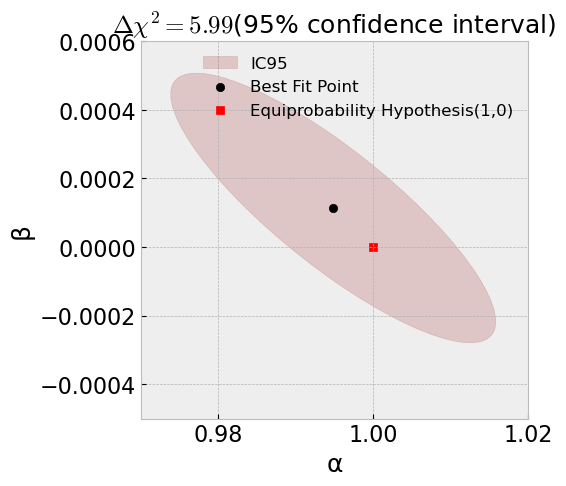

In [938]:
# plotting the IC95 ellipse and indicating best fit point and equiprobability hypothesis point
e95 = matplotlib.patches.Ellipse((par[0],par[1]),major,minor,theta,alpha = 0.2,color = 'brown', label = 'IC95')
fig, ax = plt.subplots(figsize=(5,5))
ax.add_artist(e95)
ax.scatter(par[0],par[1],marker = 'o',label = 'Best Fit Point',c = 'black')
ax.scatter(1,0,marker = 's',label = 'Equiprobability Hypothesis(1,0)',c = 'red')
ax.set_xlim(0.97,1.02)
ax.set_ylim(-0.0005,0.0006)
ax.set_xlabel('α')
ax.set_ylabel('β')
ax.set_title(f'$\Delta \chi^2 = {round(delta_chi2,2)}$(95% confidence interval)')
ax.legend()
plt.show()

In [939]:
chi2_hypo = np.sum(((count - f(ds))/sigma_fd)**2)                   # calculating chi2(a_0,b_0)
delta_chi2_hypo = chi2_hypo - chi_2                                 # calculating Delta_chi2(a_0,b_0)
pvalue_hypo = stats.chi2.sf(delta_chi2_hypo,2)                      # calculating the corresponding p-value
print(f'The corresponding p-value to the delta chi2 of the hypothesis point is {pvalue_hypo}')

The corresponding p-value to the delta chi2 of the hypothesis point is 0.7303395803323269


## $\sqrt(2)$

### 1. Computing frequencies of the 10 digits [0,9] in $\sqrt 2$

In [940]:
N = int(5e4)
mp.dps = N                          # number of digits of pi
sqrt2 = str(mp.sqrt(2))             # generating pi with the required number of digits as string

In [941]:
sqrt2

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727350138462309122970249248360558507372126441214970999358314132226659275055927557999505011527820605714701095599716059702745345968620147285174186408891986095523292304843087143214508397626036279952514079896872533965463318088296406206152583523950547457502877599617298355752203375318570113543746034084988471603868999706990048150305440277903164542478230684929369186215805784631115966687130130156185689872372352885092648612494977154218334204285686060146824720771435854874155657069677653720226485447015858801620758474922657226002085584466521458398893944370926591800311388246468157082630100594858704003186480342194897278290641045072636881313739855256117322040245091227700226941127573627280495738108967504018369868368450725799364729060762996941380475654823728997180326802474420629269124859052181004459842150591120249441341728531478105803603371077309182869314710171111683916581726889419758716582152128229518488

### 2. Drawing Histogram with error bars

In [942]:
count = np.zeros(10)           # array to store the frequency of the digits(the position in the array stores the corresponding number's frequency)
for i in range(2,N):           # loop to calculate the frequency of each digit
    count[int(sqrt2[i])] += 1
count /= N                     # normalizing the frequencies

In [943]:
sigma_fd = np.sqrt(count*(1-count)/N)              # calculating the error in the frequeny values
sigma_fd

array([0.00133337, 0.00134912, 0.00133865, 0.00133889, 0.00135853,
       0.00133794, 0.00133841, 0.00134045, 0.00133818, 0.00134236])

<BarContainer object of 10 artists>

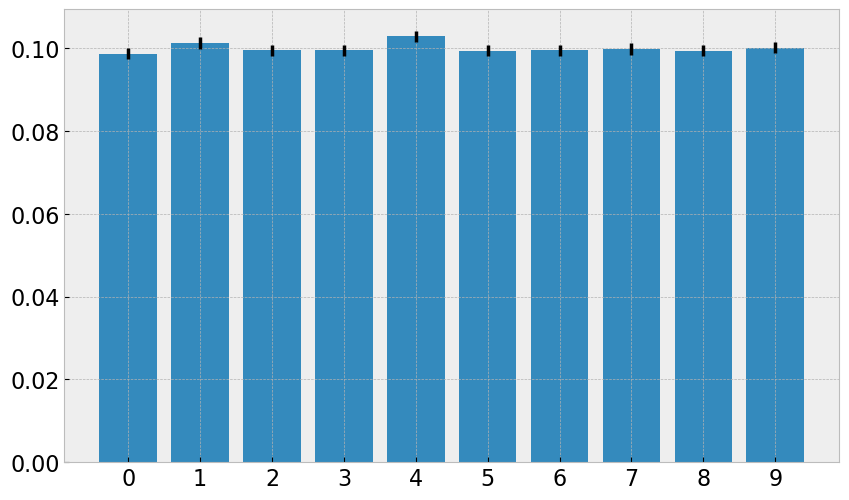

In [944]:
# Histogram with error bars
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)

### 3. Fitting the function to check for equiprobability hypothesis

In [945]:
# defining the two parameter linear function. a and b are parameters, d is the digit
# if the values of a and b are not passed then the function assumes and equiprobability hypothesis and take a,b = 1,0
def f(d,α=1.0,β=0.0):
    y = α/10 + β*d
    return y
# the (α,β) values for equiprobability hypothesis should be (1.0,0.0)

In [946]:
count        # normalized frequencies of the digits

array([0.09862, 0.10126, 0.0995 , 0.09954, 0.10286, 0.09938, 0.09946,
       0.0998 , 0.09942, 0.10012])

In [947]:
ds = np.linspace(0,9,10)             # array to contain the digits
par,cov = curve_fit(f,ds,count)      # performing the fit

### 4. Best Fit Parameters with Uncertainties, Correlation and $\chi^2$ and p-value

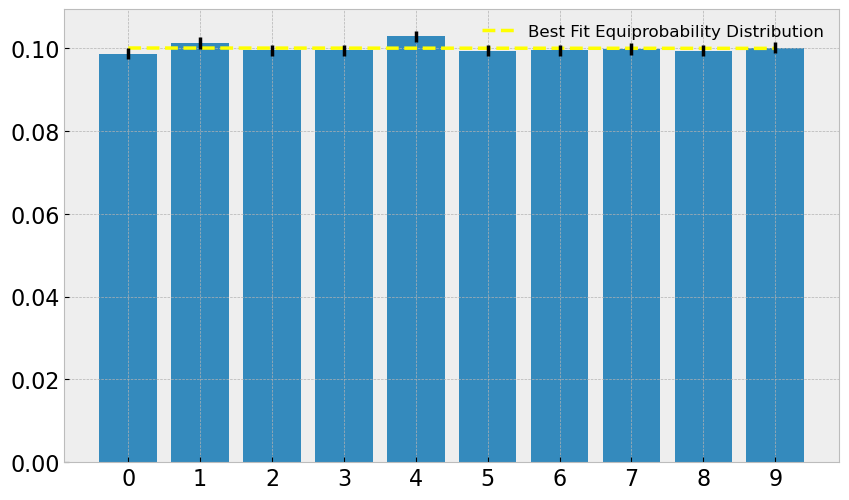

In [948]:
plt.plot(ds,f(ds,par[0],par[1]),color = 'yellow', label = 'Best Fit Equiprobability Distribution',linestyle = '--')
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)
plt.legend()
plt.show()

In [949]:
print(f'The best fit parameter values (α,β) = ({par[0]},{par[1]})')
print(f'The uncertainties in (α,β) = ({np.sqrt(cov[0,0])},{np.sqrt(cov[1,1])})')
print(f'The correlation between α and β = {cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))}')

The best fit parameter values (α,β) = (1.0003963645999445,-9.696988336083123e-06)
The uncertainties in (α,β) = (0.007547553100677884,0.00014137903690067982)
The correlation between α and β = -0.8429264729210126


In [950]:
# computing the chi2
chi_2 = np.sum(((count - f(ds,par[0],par[1]))/sigma_fd)**2)

In [951]:
print(f'The chi2 value was calculated to be {chi_2}')

The chi2 value was calculated to be 7.225283432064976


In [952]:
dof = 10 - 2                                  # Degrees of freedom of the problem(10 points and 2 parameters)
pvalue = 1 - stats.chi2.cdf(chi_2,dof)        # calculating the corresponding p-value for 8 degrees of freedom
print(f'p-value = {pvalue}')

p-value = 0.5125329784744626


### 5. plotting the IC95 error ellipse using the covariance matrix returned by the curve_fit() function
the square root of its eigenvalues are semi major and semi minor axis of the ellipse
The angle of the ellipse can also be calculated using the matrix

In [953]:
delta_chi2 = stats.chi2.ppf(0.95,2)                # delta_chi2 for IC95 for 2 degrees of freedom(a and b)
scale_factor = np.sqrt(delta_chi2)                 # factor by which the error ellipse scales

In [954]:
eigenvalues,eigenvectors = eig(cov)                # eigenvalues and aeigenvectors of the covariance matrix
major = 2*np.sqrt(eigenvalues[0])*scale_factor     # getting major and minor axes from the eigenvalues and scale factor
minor = 2*np.sqrt(eigenvalues[1])*scale_factor
theta = 0.5*np.arctan(2*cov[0,1]/(cov[0,0] - cov[1,1]))*180/np.pi     #angle of ellipse

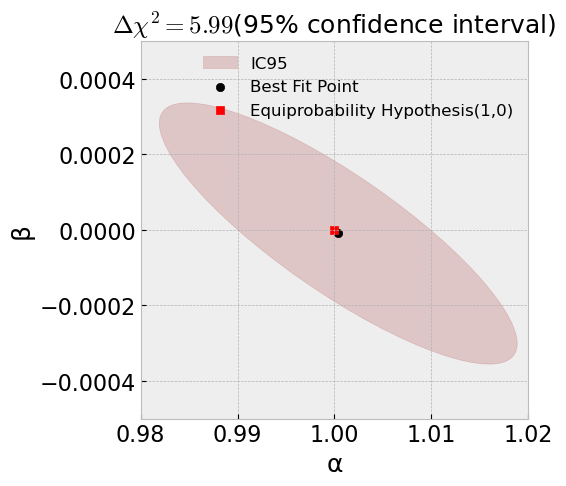

In [955]:
# plotting the IC95 ellipse and indicating best fit point and equiprobability hypothesis point
e95 = matplotlib.patches.Ellipse((par[0],par[1]),major,minor,theta,alpha = 0.2,color = 'brown', label = 'IC95')
fig, ax = plt.subplots(figsize=(5,5))
ax.add_artist(e95)
ax.scatter(par[0],par[1],marker = 'o',label = 'Best Fit Point',c = 'black')
ax.scatter(1,0,marker = 's',label = 'Equiprobability Hypothesis(1,0)',c = 'red')
ax.set_xlim(0.98,1.02)
ax.set_ylim(-0.0005,0.0005)
ax.set_xlabel('α')
ax.set_ylabel('β')
ax.set_title(f'$\Delta \chi^2 = {round(delta_chi2,2)}$(95% confidence interval)')
ax.legend()
plt.show()

In [956]:
chi2_hypo = np.sum(((count - f(ds))/sigma_fd)**2)                   # calculating chi2(a_0,b_0)
delta_chi2_hypo = chi2_hypo - chi_2                                 # calculating Delta_chi2(a_0,b_0)
pvalue_hypo = stats.chi2.sf(delta_chi2_hypo,2)                      # calculating the corresponding p-value
print(f'The corresponding p-value to the delta chi2 of the hypothesis point is {pvalue_hypo}')

The corresponding p-value to the delta chi2 of the hypothesis point is 0.9983708662154923


## Golden Ratio $\phi$

### 1. Computing frequencies of the 10 digits [0,9] in $\phi$

In [957]:
N = int(5e4)
mp.dps = N                  # number of digits of pi
φ = str(mp.phi)             # generating pi with the required number of digits as string

In [958]:
φ

'1.6180339887498948482045868343656381177203091798057628621354486227052604628189024497072072041893911374847540880753868917521266338622235369317931800607667263544333890865959395829056383226613199282902678806752087668925017116962070322210432162695486262963136144381497587012203408058879544547492461856953648644492410443207713449470495658467885098743394422125448770664780915884607499887124007652170575179788341662562494075890697040002812104276217711177780531531714101170466659914669798731761356006708748071013179523689427521948435305678300228785699782977834784587822891109762500302696156170025046433824377648610283831268330372429267526311653392473167111211588186385133162038400522216579128667529465490681131715993432359734949850904094762132229810172610705961164562990981629055520852479035240602017279974717534277759277862561943208275051312181562855122248093947123414517022373580577278616008688382952304592647878017889921990270776903895321968198615143780314997411069260886742962267575605231727775203536139

### 2. Drawing Histogram with error bars

In [959]:
count = np.zeros(10)    # array to store the frequency of the digits(the position in the array stores the corresponding number's frequency)
for i in range(2,N):    # loop to calculate the frequency of each digit
    count[int(phi[i])] += 1
count /= N              # normalizing the frequencies

In [960]:
sigma_fd = np.sqrt(count*(1-count)/N)              #calculating the error in the frequeny values
sigma_fd

array([0.00134735, 0.00133877, 0.00133746, 0.00135018, 0.0013365 ,
       0.00133973, 0.0013439 , 0.00133806, 0.00133997, 0.00134414])

<BarContainer object of 10 artists>

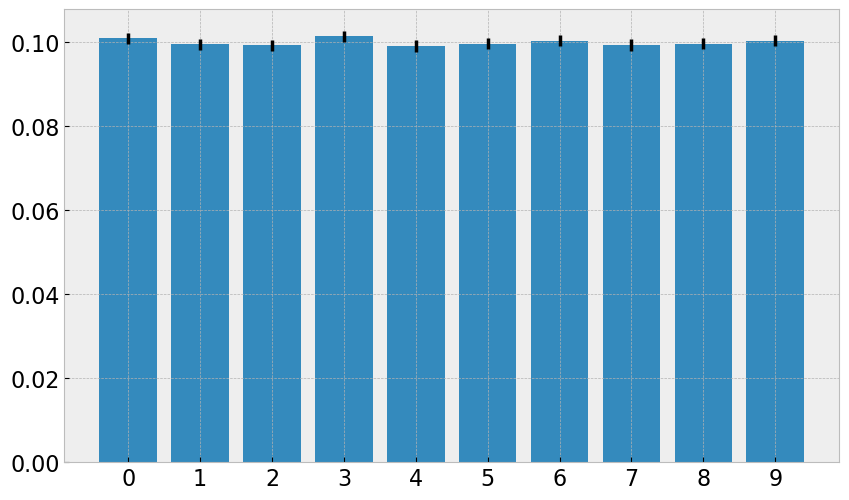

In [961]:
# Histogram with error bars
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)

### 3. Fitting the function to check for equiprobability hypothesis

In [962]:
# defining the two parameter linear function. a and b are parameters, d is the digit
# if the values of a and b are not passed then the function assumes and equiprobability hypothesis and take a,b = 1,0
def f(d,α=1.0,β=0.0):
    y = α/10 + β*d
    return y
# the (α,β) values for equiprobability hypothesis should be (1.0,0.0)

In [963]:
count        # normalized frequencies of the digits

array([0.10096, 0.09952, 0.0993 , 0.10144, 0.09914, 0.09968, 0.10038,
       0.0994 , 0.09972, 0.10042])

In [964]:
ds = np.linspace(0,9,10)             # array to contain the digits
par,cov = curve_fit(f,ds,count)      # performing the fit

### 4. Best Fit Parameters with Uncertainties, Correlation and $\chi^2$ and p-value

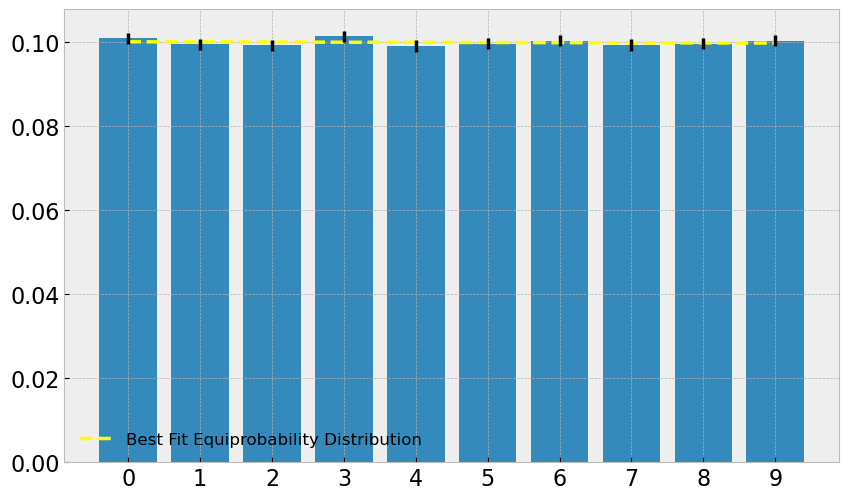

In [965]:
plt.plot(ds,f(ds,par[0],par[1]),color = 'yellow', label = 'Best Fit Equiprobability Distribution',linestyle = '--')
plt.bar(range(0,10),count,tick_label = range(0,10),yerr = sigma_fd)
plt.legend()
plt.show()

In [966]:
print(f'The best fit parameter values (α,β) = ({par[0]},{par[1]})')
print(f'The uncertainties in (α,β) = ({np.sqrt(cov[0,0])},{np.sqrt(cov[1,1])})')
print(f'The correlation between α and β = {cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))}')

The best fit parameter values (α,β) = (1.0014872721147845,-3.39393911155117e-05)
The uncertainties in (α,β) = (0.00474845758210042,8.894677673494748e-05)
The correlation between α and β = -0.8429271492629073


In [967]:
#computing the chi2
chi_2 = np.sum(((count - f(ds,par[0],par[1]))/sigma_fd)**2)

In [968]:
print(f'The chi2 value was calculated to be {chi_2}')

The chi2 value was calculated to be 2.890347022412349


In [969]:
dof = 10 - 2                                  # Degrees of freedom of the problem(10 points and 2 parameters)
pvalue = 1 - stats.chi2.cdf(chi_2,dof)        # calculating the correspondin p-value for 8 degrees of freedom
print(f'p-value = {pvalue}')

p-value = 0.9410491279273004


### 5. Plotting the IC95 error ellipse using the covariance matrix returned by the curve_fit() function
The square root of its eigenvalues are semi major and semi minor axis of the ellipse.
The angle of the ellipse can also be calculated using the matrix

In [970]:
delta_chi2 = stats.chi2.ppf(0.95,2)                # delta_chi2 for IC95 for 2 degrees of freedom(a and b)
scale_factor = np.sqrt(delta_chi2)                 # factor by which the error ellipse scales

In [971]:
eigenvalues,eigenvectors = eig(cov)                # eigenvalues and aeigenvectors of the covariance matrix
major = 2*np.sqrt(eigenvalues[0])*scale_factor     # getting major and minor axes from the eigenvalues and scale factor
minor = 2*np.sqrt(eigenvalues[1])*scale_factor
theta = 0.5*np.arctan(2*cov[0,1]/(cov[0,0] - cov[1,1]))*180/np.pi     #angle of ellipse

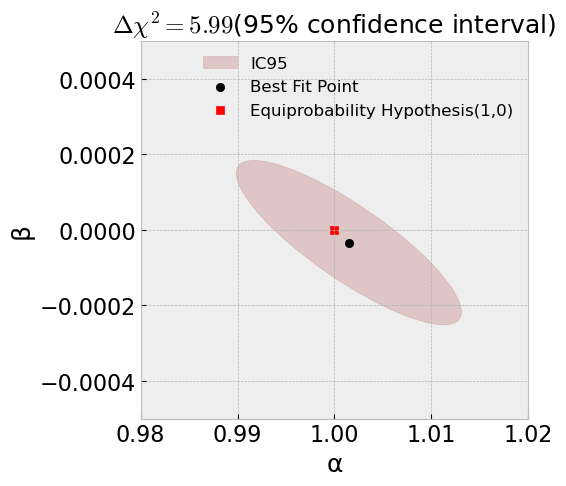

In [972]:
# plotting the IC95 ellipse and indicating best fit point and equiprobability hypothesis point
e95 = matplotlib.patches.Ellipse((par[0],par[1]),major,minor,theta,alpha = 0.2,color = 'brown', label = 'IC95')
fig, ax = plt.subplots(figsize=(5,5))
ax.add_artist(e95)
ax.scatter(par[0],par[1],marker = 'o',label = 'Best Fit Point',c = 'black')
ax.scatter(1,0,marker = 's',label = 'Equiprobability Hypothesis(1,0)',c = 'red')
ax.set_xlim(0.98,1.02)
ax.set_ylim(-0.0005,0.0005)
ax.set_xlabel('α')
ax.set_ylabel('β')
ax.set_title(f'$\Delta \chi^2 = {round(delta_chi2,2)}$(95% confidence interval)')
ax.legend()
plt.show()

In [973]:
chi2_hypo = np.sum(((count - f(ds))/sigma_fd)**2)                   # calculating chi2(a_0,b_0)
delta_chi2_hypo = chi2_hypo - chi_2                                 # calculating Delta_chi2(a_0,b_0)
pvalue_hypo = stats.chi2.sf(delta_chi2_hypo,2)                      # calculating the corresponding p-value
print(f'The corresponding p-value to the delta chi2 of the hypothesis point is {pvalue_hypo}')

The corresponding p-value to the delta chi2 of the hypothesis point is 0.9749667468562535


# DEDUCTIONS 

- From the results obtained from the four constants above, I have the following deductions:

1. There is a consistent negative correlation between the parameters α and β for all four constants. This suggests a systematic relationship in digit density that is captured by the model.

2. The best fit parameter values (α, β) vary among the constants, indicating distinct digit density patterns associated with each mathematical constant. For Pi, Euler's constant, root 2, and the Golden Ratio, the values of α and β reveal unique characteristics in how digits are distributed.

3. The chi2 values provide insights into the goodness of fit for the statistical model. Lower chi2 values indicate better agreement between the observed and expected digit frequencies. The p-values associated with the chi2 tests reflect the likelihood of obtaining the observed digit frequencies by chance. Generally, higher p-values indicate a better fit to the model.

4. The p-values corresponding to the delta chi2 of the hypothesis point after the 95% confidence interval are consistently high for all constants. This suggests that the null hypothesis is not rejected, supporting the validity of the statistical model.

5. The results imply that mathematical constants, such as Pi, Euler's constant, square root 2, and the Golden Ratio, contribute distinct but systematic patterns to digit density. The negative correlation between α and β suggests a trade-off or balancing act in the distribution of digits, highlighting the intricate relationship between mathematical constants and digit occurrences.

Finally, the digit density analysis provides valuable insights into the statistical behavior of digits associated with Pi, Euler's constant, square root 2, and the Golden Ratio. The results contribute to our understanding of the intricate connection between mathematical constants and digit occurrences.

# II - The Law of Anomalous Numbers

### 1. Frequency of 1st digit of Fibonacci Numbers and Benford Distribution

In [974]:
def fib(n):                                     # function to generate array of 1st digits of n fibonacci numbers fast
    f_series = [0,1]
    digit_1 = ['0','1']
    for i in range(2,n+1):
        a = f_series[-1]+f_series[-2]
        f_series.append(a)
        digit_1.append(str(a)[0])
    return np.array(f_series),np.array(digit_1)

In [975]:
def fib_1(f,n):
    digit_1 = []
    for i in range(n+1):
        digit_1.append(str(f[i])[0])
    digit_1 = np.array(digit_1)

In [976]:
N = int(5e4)                      # No. of fibonacci numbers generated
f_series,digit_1 = fib(N)         # array containing N fibonacci numbers and their 1st digit

In [977]:
count = np.zeros(9)               # array to store the frequency of the digits(the position in the array stores the corresponding number's frequency)
for i in range(0,N+1):            # loop to calculate the frequency of each digit
    count[int(digit_1[i])-1] += 1
count /= N                        # normalizing the frequencies

In [978]:
count

array([0.30104, 0.17608, 0.12496, 0.09688, 0.07918, 0.06698, 0.05796,
       0.05116, 0.04578])

In [979]:
sigma_fd = np.sqrt(count*(1-count)/N)              # calculating the error in the frequeny values

<BarContainer object of 9 artists>

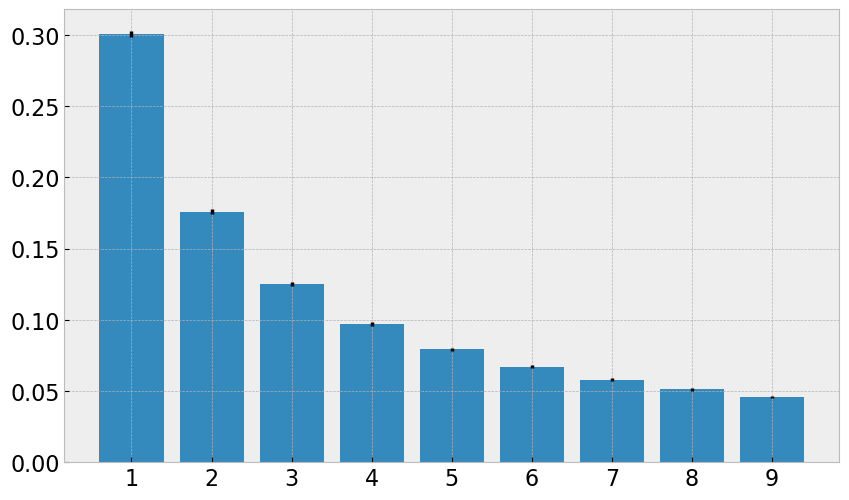

In [980]:
#Histogram with error bars
plt.bar(range(1,10),count,tick_label = range(1,10),yerr = sigma_fd)

In [981]:
def f_ben(d,a = 1,b = 0):                  # The Newcomb Benford Distribution
    y = np.log10(d+a) - np.log10(d+b)
    return y

In [982]:
ds = np.linspace(1,9,9)                    # array to store the digits
ds_plot = np.linspace(1,9,100)             # array to store the digits for plotting the best fit function

In [983]:
par,cov = curve_fit(f_ben,ds,count)         # performing the best fit

C:\Users\davem\AppData\Local\Temp\ipykernel_16780\2114954442.py:2: RuntimeWarning: invalid value encountered in log10
  y = np.log10(d+a) - np.log10(d+b)


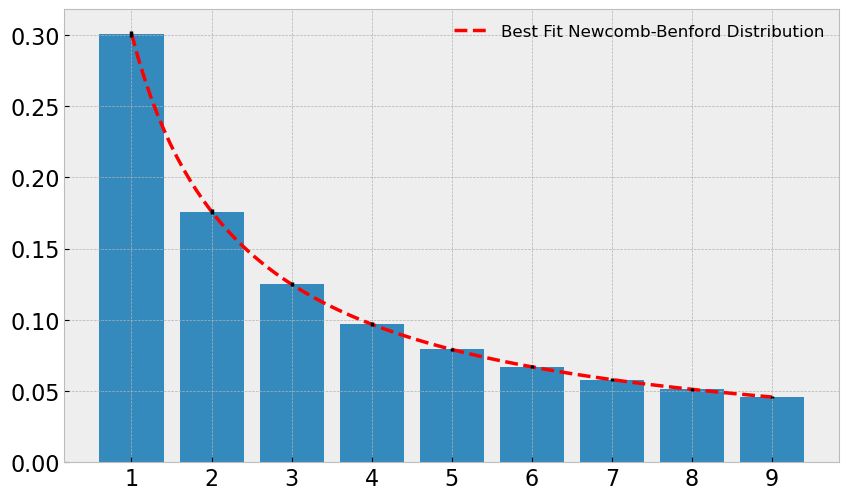

In [984]:
#plotting the frequency histogram and the best fit function
plt.plot(ds_plot,f_ben(ds_plot,par[0],par[1]),color = 'red', label = 'Best Fit Newcomb-Benford Distribution',linestyle = '--')
plt.bar(range(1,10),count,tick_label = range(1,10),yerr = sigma_fd)
plt.legend()
plt.show()

In [985]:
print(f'The best fit parameter values (a,b) = ({par[0]},{par[1]})')
print(f'The uncertainties in (a,b) = ({np.sqrt(cov[0,0])},{np.sqrt(cov[1,1])})')
print(f'The correlation between a and b = {cov[0,1]/(np.sqrt(cov[0,0])*np.sqrt(cov[1,1]))}')

The best fit parameter values (a,b) = (0.9999459842291119,-4.370096816177938e-05)
The uncertainties in (a,b) = (0.000366619646462504,0.00021907170655978577)
The correlation between a and b = 0.9781785084646291


In [986]:
#computing the chi2
chi_2 = np.sum(((count - f_ben(ds,par[0],par[1]))/sigma_fd)**2)

In [987]:
print(f'The chi2 value was calculated to be {chi_2}')

The chi2 value was calculated to be 0.003242389115182938


In [988]:
dof = 9 - 2                                        # Degrees of freedom of the problem(9 points and 2 parameters)
pvalue = 1 - stats.chi2.cdf(chi_2,dof)             # calculating the correspondin p-value for 8 degrees of freedom
print(f'p-value = {pvalue}')

p-value = 0.999999999985269


In [989]:
delta_chi2 = stats.chi2.ppf(0.95,2)                # delta_chi2 for IC95 for 2 degrees of freedom(a and b)
scale_factor = np.sqrt(delta_chi2)                 # factor by which the error ellipse scales

In [990]:
eigenvalues,eigenvectors = eig(cov)                # eigenvalues and aeigenvectors of the covariance matrix
major = 2*np.sqrt(eigenvalues[0])*scale_factor     # getting major and minor axes from the eigenvalues and scale factor
minor = 2*np.sqrt(eigenvalues[1])*scale_factor
theta = 0.5*np.arctan(2*cov[0,1]/(cov[0,0] - cov[1,1]))*180/np.pi     #angle of ellipse

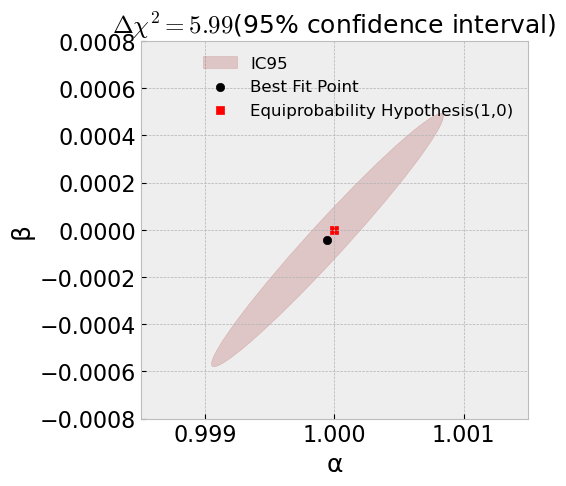

In [991]:
# plotting the IC95 ellipse and indicating best fit point and equiprobability hypothesis point
e95 = matplotlib.patches.Ellipse((par[0],par[1]),major,minor,theta,alpha = 0.2,color = 'brown', label = 'IC95')
fig, ax = plt.subplots(figsize=(5,5))
ax.add_artist(e95)
ax.scatter(par[0],par[1],marker = 'o',label = 'Best Fit Point',c = 'black')
ax.scatter(1,0,marker = 's',label = 'Equiprobability Hypothesis(1,0)',c = 'red')
ax.set_xlim(0.9985,1.0015)
ax.set_ylim(-0.0008,0.0008)
ax.set_xlabel('α')
ax.set_ylabel('β')
ax.set_title(f'$\Delta \chi^2 = {round(delta_chi2,2)}$(95% confidence interval)')
ax.legend()
plt.show()

In [992]:
chi2_hypo = np.sum(((count - f_ben(ds))/sigma_fd)**2)               # calculating chi2(a_0,b_0)
delta_chi2_hypo = chi2_hypo - chi_2                                 # calculating Delta_chi2(a_0,b_0)
pvalue_hypo = stats.chi2.sf(delta_chi2_hypo,2)                      # calculating the corresponding p-value
print(f'The corresponding p-value to the delta chi2 of the hypothesis point is {pvalue_hypo}')

The corresponding p-value to the delta chi2 of the hypothesis point is 0.9999988867397444


# The Fibonacci Numbers and Benford Distribution can equally be computed alternatively as shown below

In [993]:
def fibonacci_first_digits(n_terms):                        # Function to generate Fibonacci numbers and their first digits
    fib_numbers = [0, 1]
    for _ in range(2, n_terms):
        fib_numbers.append(fib_numbers[-1] + fib_numbers[-2])
    first_digits = [int(str(fib)[0]) for fib in fib_numbers[2:]] # Exclude the first two terms (0, 1)
    return first_digits

In [994]:
def calculate_frequencies(digits):         # Frequency calculation function
    counts = np.bincount(digits)[1:]       # Exclude the count for the leading digit '0'
    frequencies = counts / np.sum(counts)
    return frequencies


In [995]:
def log_model(d, alpha, beta):                         # Logarithmic model function
    return np.log10(d + alpha) - np.log10(d + beta)

In [996]:
def benford_law(d):                                   # Benford's Law function
    return np.log10(1 + 1/d)


In [997]:
# Fit the model and plot
n_terms = 1000                                     # Number of terms in the Fibonacci sequence to analyze
first_digits = fibonacci_first_digits(n_terms)
frequencies = calculate_frequencies(first_digits)
digits = np.arange(1, 10)                          # Possible first digits 1 through 9


In [998]:
# Calculate the errors for frequencies assuming a binomial distribution
errors = np.sqrt(frequencies * (1 - frequencies) / n_terms)
params, covariance = curve_fit(log_model, digits, frequencies, sigma=errors) # Fit the data to the log model

C:\Users\davem\AppData\Local\Temp\ipykernel_16780\3963706386.py:2: RuntimeWarning: invalid value encountered in log10
  return np.log10(d + alpha) - np.log10(d + beta)


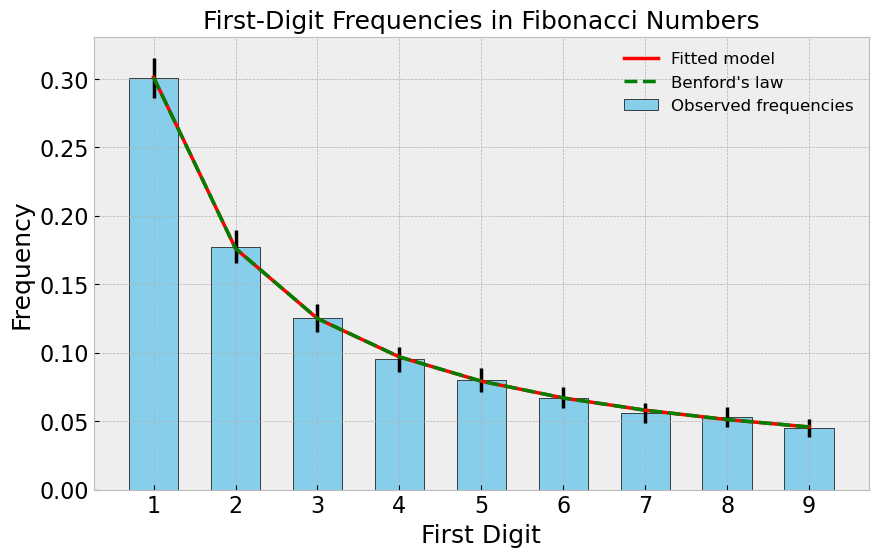

In [999]:
plt.figure(figsize=(10, 6))     # Plotting the histogram and the fit
plt.bar(digits, frequencies, width=0.6, color='skyblue', edgecolor='black', yerr=errors, label='Observed frequencies')
plt.plot(digits, log_model(digits, *params),  'r-', label='Fitted model')
plt.plot(digits, benford_law(digits), 'g--', label="Benford's law")
plt.xlabel('First Digit')
plt.ylabel('Frequency')
plt.xticks(digits)
plt.legend()
plt.title('First-Digit Frequencies in Fibonacci Numbers')
plt.show()

In [1000]:
alpha_hat, beta_hat = params  # Output the parameters and compare to Benford's hypothesis
alpha_0, beta_0 = 1.0, 0.0
print(f"Estimated parameters: alpha = {alpha_hat}, beta = {beta_hat}")
print(f"Expected Benford parameters: alpha = {alpha_0}, beta = {beta_0}")

Estimated parameters: alpha = 0.998989811067753, beta = -0.0005308740837429397
Expected Benford parameters: alpha = 1.0, beta = 0.0


### 2. Chekcing Benford Distribution for Product of Random Variables

Generating 2 random numbers

In [1001]:
n = 2                            # number of random number generated
N = int(5e4)                     # number of Z values taken
X = np.random.uniform(1,2,(n,N)) # generating uniformly distributed random numbers

Z = np.product(X,axis = 0)       # Forming the products

In [1002]:
Z

array([2.63815946, 2.07064527, 2.79987503, ..., 2.49752374, 1.88550612,
       2.59747168])

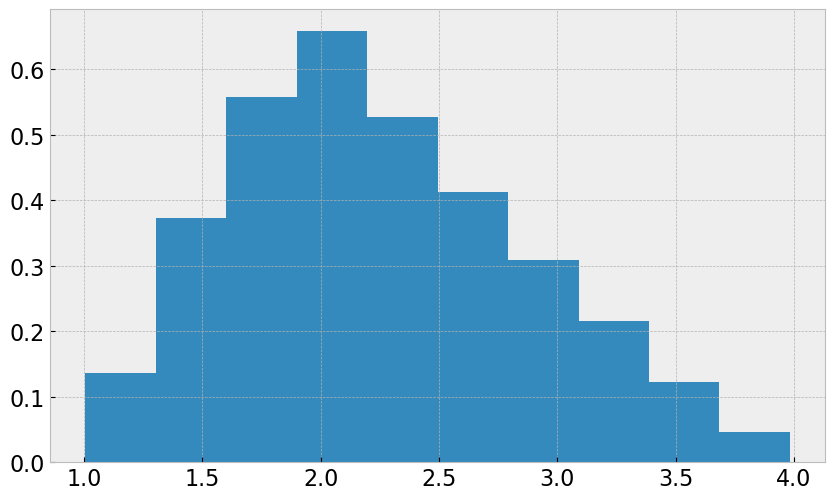

In [1003]:
#plotting the histogram
plt.hist(Z,bins = 10,density = True)
plt.show()

In [1004]:
par,cov = curve_fit(f,ds,count)

In [1005]:
zs = np.linspace(min(Z),max(Z),100)

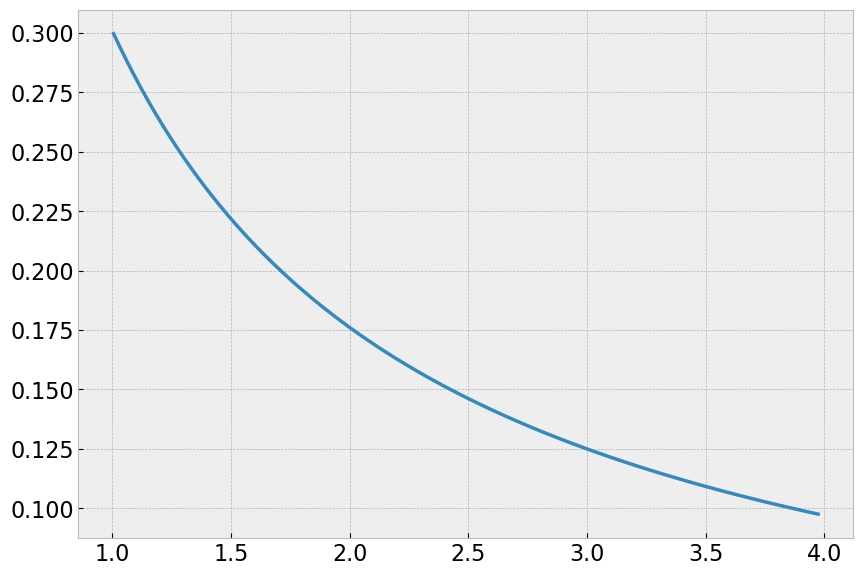

In [903]:
plt.plot(zs,f_ben(zs))